In [1]:
# importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# plot style
style.use("ggplot")

In [2]:
# loading data
filename = "E:/PROGRAM/ML/ML_Projects/ENB2012_data.xlsx"
energy = pd.read_excel(filename)

In [3]:
# showing first 10 samples of each feature and labels
energy.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [4]:
# brief description of data type
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
# descriptive view
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
# checking for correlation
energy.corr(method='pearson')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


<IPython.core.display.Javascript object>


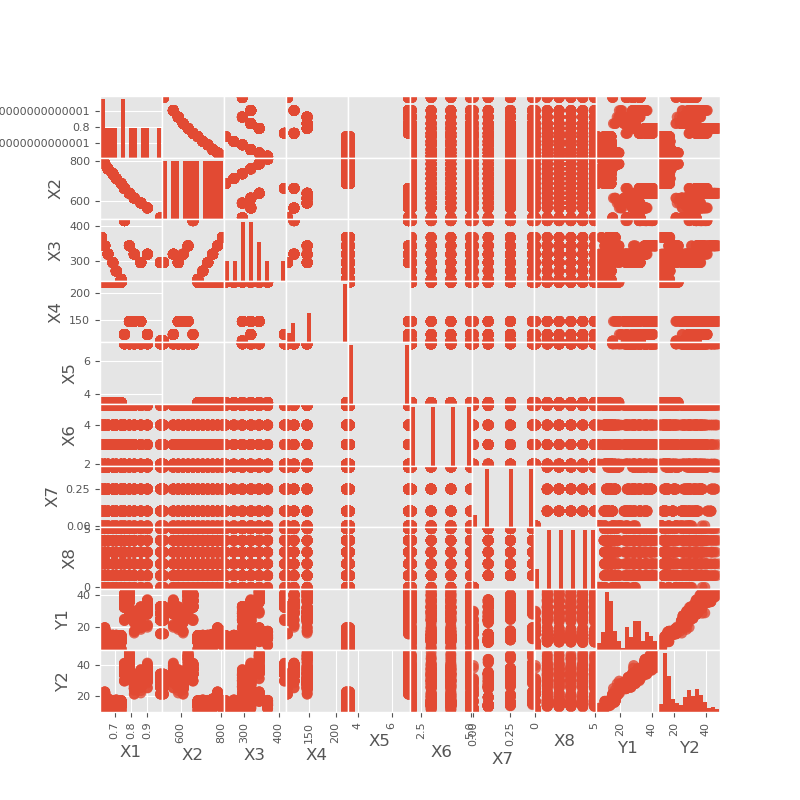

In [7]:
# further correlation view
energy_corr = scatter_matrix(energy, figsize=(8, 8), marker='o', 
                                hist_kwds={'bins': 15}, s=60, alpha=.8)

<IPython.core.display.Javascript object>


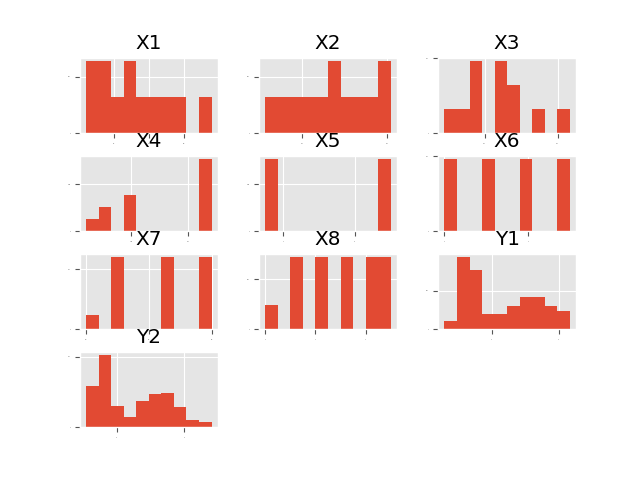

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1354585C0>,
      dtype=object)

In [9]:
# histogram view
energy.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

<IPython.core.display.Javascript object>


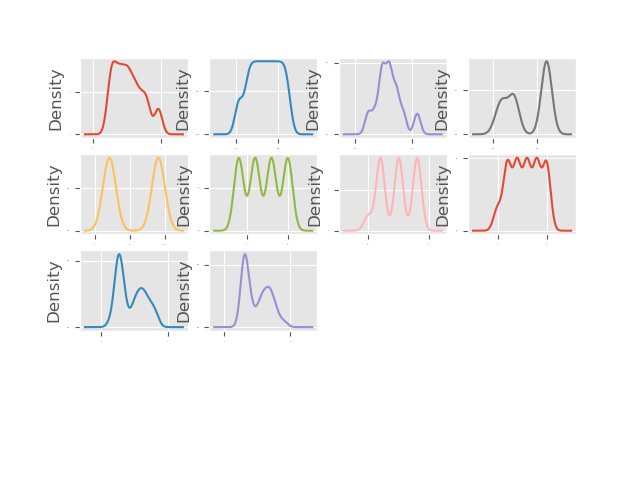

In [10]:
# checking for distribution with curve shape
energy.plot(kind='density', subplots=True, sharex=False,
           layout=(4,4), legend=False, fontsize=1)
plt.show()

<IPython.core.display.Javascript object>


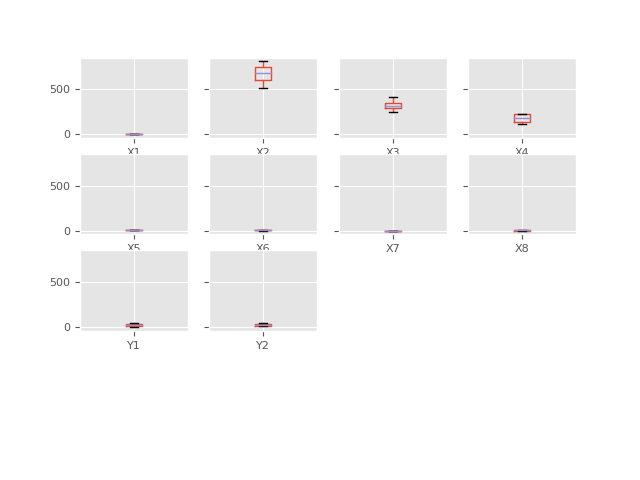

In [11]:
# box plot view
energy.plot(kind='box', subplots=True, sharex=False, sharey=True,
           layout=(4,4), legend=False, fontsize=8)
plt.show()

In [12]:
# separating data into heat and cool loads
heat_load = energy[['X1','X2','X3','X4','X5','X6','X7','X8','Y1']]
cool_load = energy[['X1','X2','X3','X4','X5','X6','X7','X8','Y2']]

In [13]:
# array of features and labels
X_heat = np.array(heat_load.drop(['Y1'],1))
y_heat = np.array(heat_load[['Y1']])

X_cool = np.array(cool_load.drop(['Y2'],1))
y_cool = np.array(cool_load[['Y2']])

In [14]:
# splitting heat load into train and test set
test_size = 0.2
seed = 42
# for heat load
Xh_train, Xh_test, yh_train, yh_test = train_test_split (X_heat, y_heat,
                                                      test_size=test_size,
                                                      random_state=seed)
# for cool load
Xc_train, Xc_test, yc_train, yc_test = train_test_split (X_cool, y_cool,
                                                      test_size=test_size,
                                                      random_state=seed)

In [15]:
# normalizing train and test features 
scaler = MinMaxScaler()

Xh_train = scaler.fit_transform(Xh_train)
Xh_test = scaler.transform(Xh_test)

Xc_train = scaler.fit_transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

In [16]:
# checking array dimensions
print('dimensions for heat load')
print('train features:{}, train labels:{}'.format(Xh_train.shape, yh_train.shape))
print('test features:{}, test labels:{}'.format(Xh_test.shape, yh_test.shape))

print('dimensions for cool load')
print('train features:{}, train labels:{}'.format(Xc_train.shape, yc_train.shape))
print('test features:{}, test labels:{}'.format(Xc_test.shape, yc_test.shape))

dimensions for heat load
train features:(614, 8), train labels:(614, 1)
test features:(154, 8), test labels:(154, 1)
dimensions for cool load
train features:(614, 8), train labels:(614, 1)
test features:(154, 8), test labels:(154, 1)


<IPython.core.display.Javascript object>


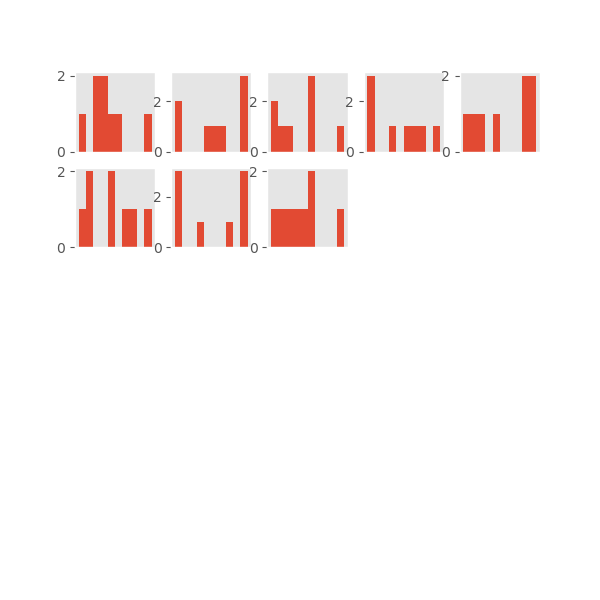

In [19]:
# showing normalized features
plt.figure(figsize=(6,6))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    plt.hist(Xh_train[i])
plt.show()

In [22]:
# mode selection
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))
models.append(('DTR', DecisionTreeRegressor()))
names = []
descr = "validation scores for heat load"
X_train = Xh_train
y_train = yh_train
for i in range(2):
    print(descr)
    for name, model in models: 
        print (name)
        clf = model 
        clf.fit(X_train, y_train)
        n_splits = 10
        seed = 0
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        scores = cross_val_score(clf, X_train, y_train, cv=kfold)
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std()) 
    descr = "validation scores for cool load"
    X_train = Xc_train
    y_train = yc_train

validation scores for heat load
LR
Scores: [0.92986917 0.89584009 0.89761932 0.94064255 0.92335062 0.89900405
 0.86896363 0.92391269 0.9369764  0.90763044]
Mean: 0.9123808960786522
Standard deviation: 0.02130935403585046
Lasso
Scores: [0.74646427 0.77157239 0.74730166 0.78268578 0.79635895 0.74555523
 0.67572273 0.7357816  0.73072901 0.72374667]
Mean: 0.7455918288954269
Standard deviation: 0.03210604917370674
Ridge
Scores: [0.92510115 0.90470631 0.89666936 0.94139017 0.92343077 0.89248029
 0.86388566 0.92365089 0.93293958 0.90462324]
Mean: 0.9108877420459874
Standard deviation: 0.021832487121679102
DTR
Scores: [0.99682833 0.99462808 0.9974517  0.99781992 0.99717066 0.99755999
 0.99774639 0.99763325 0.99685501 0.99673694]
Mean: 0.9970430266016086
Standard deviation: 0.0008890627375721057
validation scores for cool load
LR
Scores: [0.91043564 0.8526632  0.89614062 0.90549848 0.91844297 0.83992099
 0.81823294 0.89077888 0.90420778 0.88764502]
Mean: 0.8823966515448864
Standard deviation: 0

In [23]:
# evaluating selected models
models = []    
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
names = []
descr = "train and test accuracy scores for heat load"
X_train = Xh_train
y_train = yh_train
X_test = Xh_test
y_test = yh_test
for i in range(2):
    print(descr)
    for name, model in models: 
        clf = model 
        clf.fit(X_train, y_train)
        train_results = clf.score(X_train, y_train)
        test_results = clf.score(X_test,  y_test)
        msg = "name:{}, TrainResults:{}, TestResults:{}".format(name,
                                                                 train_results, 
                                                                 test_results)
        print(msg)
    descr = "train and test accuracy scores for cool load"
    X_train = Xc_train
    y_train = yc_train
    X_test = Xc_test
    y_test = yc_test

train and test accuracy scores for heat load
name:LR, TrainResults:0.9170667543240835, TestResults:0.9121616885799224
name:DTR, TrainResults:1.0, TestResults:0.9963040351141297
train and test accuracy scores for cool load
name:LR, TrainResults:0.8859238002622107, TestResults:0.893339386431132
name:DTR, TrainResults:1.0, TestResults:0.9560806377214944


In [24]:
# applying polynomial features
poly = PolynomialFeatures() 

Xhp_train = poly.fit_transform(Xh_train)
Xhp_test = poly.transform(Xh_test)

Xcp_train = poly.fit_transform(Xc_train)
Xcp_test = poly.transform(Xc_test)

<IPython.core.display.Javascript object>


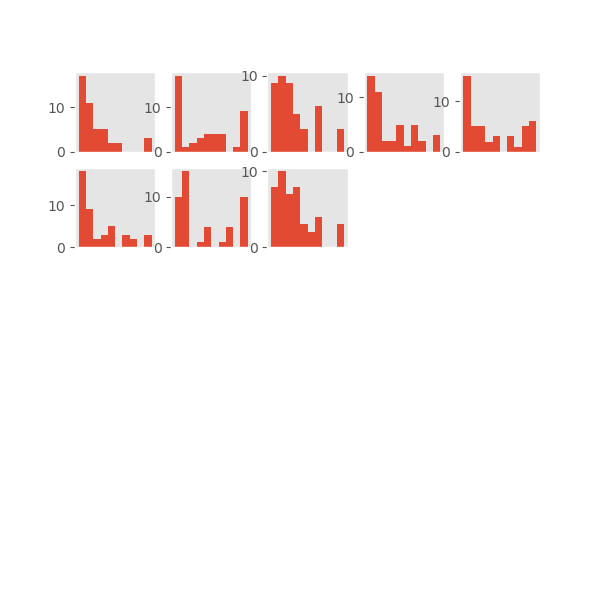

In [25]:
# showing polynomial transformed features
plt.figure(figsize=(6,6))
for i in range(8):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.xticks([])
    plt.grid(False)
    plt.hist(Xhp_train[i])
plt.show()

In [28]:
# linear regression evaluation on transformed features
descr = "train and test accuracy scores for heat load"
X_train = Xhp_train
y_train = yh_train
X_test = Xhp_test
y_test = yh_test
name = 'Linear Regression'
clf = LinearRegression()
for i in range(2):
    print(descr) 
    clf.fit(X_train, y_train)
    train_results = clf.score(X_train, y_train)
    test_results = clf.score(X_test,  y_test)
    msg = "name:{}, Train Results:{}, Test Results:{}".format(name,
                                                            train_results, 
                                                            test_results)
    print(msg)
    descr = "train and test accuracy scores for cool load"
    X_train = Xcp_train
    y_train = yc_train
    X_test = Xcp_test
    y_test = yc_test

train and test accuracy scores for heat load
name:Linear Regression, Train Results:0.9951443671410094, Test Results:0.993628892744709
train and test accuracy scores for cool load
name:Linear Regression, Train Results:0.9728495151066151, Test Results:0.967392586950324
